### Exercici 1

Descarrega el data set Airlines Delay: Airline on-time statistics and delay causes i carrega’l a un pandas Dataframe. Explora les dades que conté, i queda’t únicament amb les columnes que consideris rellevants.





Primero echemos un vistazo al archivo , para comprobar que se ha cargado correctamente y los campos que tiene.Para ello vamos a imprimir las 3 primeras filas y ver la info de los datos de las columnas.

In [3]:
import pandas as pd

retraso_aviones_df=pd.read_csv("DelayedFlights.csv")
retraso_aviones_df[:3]



,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,...,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,1,2008,1,3,4,754.0,735,1002.0,1000,WN,...,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2,2008,1,3,4,628.0,620,804.0,750,WN,...,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN


In [4]:
retraso_aviones_df.dtypes

Unnamed: 0             int64
Year                   int64
Month                  int64
DayofMonth             int64
DayOfWeek              int64
DepTime              float64
CRSDepTime             int64
ArrTime              float64
CRSArrTime             int64
UniqueCarrier         object
FlightNum              int64
TailNum               object
ActualElapsedTime    float64
CRSElapsedTime       float64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin                object
Dest                  object
Distance               int64
TaxiIn               float64
TaxiOut              float64
Cancelled              int64
CancellationCode      object
Diverted               int64
CarrierDelay         float64
WeatherDelay         float64
NASDelay             float64
SecurityDelay        float64
LateAircraftDelay    float64
dtype: object

Muy bonico , ¿pero que significa cada columna?<br>
<a href="airline2008_dataset_definition.pdf">Ver guía campos</a>

_Conceptos columnas causas Delays_:<br>
_Air Carrier_: The cause of the cancellation or delay was due to circumstances within the airline's control (e.g. maintenance or crew problems, aircraft cleaning, baggage loading, fueling, etc.)<br>
_Extreme Weather_: Significant meteorological conditions (actual or forecasted) that, in the judgment of the carrier, delays or prevents the operation of a flight such as tornado, blizzard or hurricane.<br>
_National Aviation System (NAS)_: Delays and cancellations attributable to the national aviation system that refer to a broad set of conditions, such as non-extreme weather conditions, airport operations, heavy traffic volume, and air traffic control.<br>
_Late-arriving aircraft_: A previous flight with same aircraft arrived late, causing the present flight to depart late.<br>
_Security_: Delays or cancellations caused by evacuation of a terminal or concourse, re-boarding of aircraft because of security breach, inoperative screening equipment and/or long lines in excess of 29 minutes at screening areas.<br>


Muy bien , ahora que sabemos que nos dice el archivo, ¿Que queremos saber de los datos?<br>
Por lo que se pregunta en el ejercicio 2 , asumo que se quiere una visión global de las causas generales más que datos individuales.Por lo tanto ,me deshare de campos como las matrículas de los aviones , que si serian relevantes si deseasemos saber si ,por ej,hay algun avión en concreto que sea problemático.

In [5]:
delay_filtrado_df=retraso_aviones_df.drop(["Unnamed: 0","FlightNum","TailNum"],axis=1)

Sigamos limpiando de datos que no nos son útiles para nuestras preguntas.¿El campo año es relevante?

In [6]:
delay_filtrado_df["Year"].describe()

count    1936758.0
mean        2008.0
std            0.0
min         2008.0
25%         2008.0
50%         2008.0
75%         2008.0
max         2008.0
Name: Year, dtype: float64

Esta claro que todos los datos son del año 2008, por lo que es un dato que podemos sacar del dataFrame.<br>
Además con las asunciones que hemos hecho , vamos a descartar tambien las columnas con los registros horarios de salidas/llegadas , ya que usaremos los intervalos que ya se encuentran calculados en otras columnas.

In [7]:
delay_filtrado_df=delay_filtrado_df.drop(["Year","DepTime","CRSDepTime","ArrTime","CRSArrTime"],axis=1)
delay_filtrado_df[:3]

,Month,DayofMonth,DayOfWeek,UniqueCarrier,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,1,3,4,WN,128.0,150.0,116.0,-14.0,8.0,IAD,...,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,1,3,4,WN,128.0,145.0,113.0,2.0,19.0,IAD,...,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,1,3,4,WN,96.0,90.0,76.0,14.0,8.0,IND,...,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN


Nos centraremos en los retrasos normales y vamos a filtrar los datos para quedarnos con los vuelos que no han sido cancelados o desviados.<br>
Antes de ello ,comprobemos que peso tienen en el total de la población muestral. Para ello nos quedamos con los campos con _Diverted_ = 1 y _Cancelled_=1

In [8]:
cancelado_no=delay_filtrado_df["Cancelled"]==1
desviado_no=delay_filtrado_df["Diverted"]==1
print("El dataframe base tiene forma: "+ str(delay_filtrado_df.shape))
print("El dataframe de vuelos cancelados tiene forma: "+str(delay_filtrado_df[cancelado_no].shape))
print("El dataframe de vuelos desviados tiene forma: "+str(delay_filtrado_df[desviado_no].shape))

El dataframe base tiene forma: (1936758, 22)
El dataframe de vuelos cancelados tiene forma: (633, 22)
El dataframe de vuelos desviados tiene forma: (7754, 22)


Observamos que entre vuelos cancelados y desviados no llegan al 0.5% del total de vuelos .Po lo que filtramos para quitar los datos y descartamos las columnas correspondientes.


In [9]:
cancelado_no=delay_filtrado_df["Cancelled"]==0
desviado_no=delay_filtrado_df["Diverted"]==0
delay_filtrado_df=delay_filtrado_df[cancelado_no & desviado_no]
delay_filtrado_df=delay_filtrado_df.drop(["Cancelled","CancellationCode","Diverted"],axis=1)
delay_filtrado_df[:3]

,Month,DayofMonth,DayOfWeek,UniqueCarrier,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,1,3,4,WN,128.0,150.0,116.0,-14.0,8.0,IAD,TPA,810,4.0,8.0,NaN,NaN,NaN,NaN,NaN
1,1,3,4,WN,128.0,145.0,113.0,2.0,19.0,IAD,TPA,810,5.0,10.0,NaN,NaN,NaN,NaN,NaN
2,1,3,4,WN,96.0,90.0,76.0,14.0,8.0,IND,BWI,515,3.0,17.0,NaN,NaN,NaN,NaN,NaN


Vemos el peso que puede tener el TaxiIn y el TaxiOut. Primero veo sus valores máximos para ver si pueden ser desdeñables

In [10]:
delay_filtrado_df.sort_values("TaxiIn",ascending=False)[:5]

,Month,DayofMonth,DayOfWeek,UniqueCarrier,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
1779984,12,10,3,XE,446.0,217.0,191.0,334.0,105.0,ORF,IAH,1201,240.0,15.0,0.0,0.0,334.0,0.0,0.0
1779890,12,10,3,XE,369.0,155.0,134.0,236.0,22.0,SDF,IAH,788,225.0,10.0,0.0,0.0,219.0,0.0,17.0
905023,6,19,4,WN,315.0,115.0,94.0,245.0,45.0,OAK,PHX,646,207.0,14.0,7.0,0.0,200.0,0.0,38.0
651140,4,20,7,DL,294.0,305.0,83.0,250.0,261.0,LAS,JFK,2248,200.0,11.0,0.0,0.0,0.0,0.0,250.0
1779802,12,10,3,XE,356.0,133.0,112.0,291.0,68.0,COS,IAH,809,200.0,44.0,0.0,0.0,291.0,0.0,0.0


In [11]:
delay_filtrado_df.sort_values("TaxiOut",ascending=False)[:5]

,Month,DayofMonth,DayOfWeek,UniqueCarrier,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
1173580,7,23,3,DL,776.0,408.0,346.0,410.0,42.0,JFK,SFO,2586,8.0,422.0,0.0,0.0,368.0,0.0,42.0
1779939,12,10,3,XE,448.0,64.0,50.0,452.0,68.0,IAH,BTR,253,5.0,393.0,0.0,16.0,384.0,0.0,52.0
1930131,12,10,3,CO,574.0,179.0,183.0,450.0,55.0,IAH,MSP,1034,5.0,386.0,0.0,55.0,395.0,0.0,0.0
96006,1,16,3,DL,619.0,260.0,230.0,399.0,40.0,ATL,PHX,1587,6.0,383.0,26.0,0.0,359.0,0.0,14.0
96014,1,16,3,DL,663.0,321.0,277.0,397.0,55.0,ATL,OAK,2130,7.0,379.0,0.0,55.0,342.0,0.0,0.0


Por simple inferencia podemos ver que poseen valores no despreciables .Como la muestra es tan grande , comprobamos la estadistica ya que viendo 5 valores no nos da una idea de su peso.Por otro lado podemos intuir relaciones entre algunas columnas:<br>
__Hipótesis1__: _ActualElapsedTime_=_AirTime_+_TaxiIn_+_TaxiOut_<br>
__Hipótesis2__: _ArrDelay_=(_ActualElapsedTime_-_CRSElapsedTime_)+_DepDelay_

Comprobemos las hipótesis:

In [12]:
#hipótesis1
hipotesis1=delay_filtrado_df[["ActualElapsedTime","AirTime","TaxiIn","TaxiOut"]]
hipotesis1.isna().sum()
suma1=hipotesis1["AirTime"]+hipotesis1["TaxiIn"]+hipotesis1["TaxiOut"]
hipotesis1.insert(0,"SuM",hipotesis1["ActualElapsedTime"]-suma1,allow_duplicates=False)
display(hipotesis1.mean())

SuM                    0.000000
ActualElapsedTime    133.305863
AirTime              108.277147
TaxiIn                 6.811388
TaxiOut               18.217328
dtype: float64

comprobemoslo gráficamente:


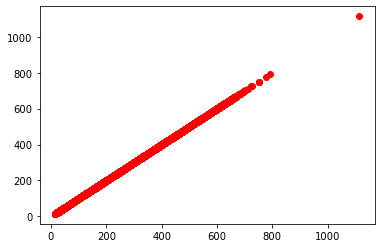

In [13]:
import matplotlib.pyplot as plt
plt.scatter(hipotesis1["ActualElapsedTime"],suma1,color="red")
plt.show()


No comments ;)
Repetimos con la hipótesis 2

In [14]:
#hipotesis2
hipotesis2=delay_filtrado_df[["ArrDelay","DepDelay","ActualElapsedTime","CRSElapsedTime"]]
suma2=hipotesis2["ActualElapsedTime"]-hipotesis2["CRSElapsedTime"]+hipotesis2["DepDelay"]
hipotesis2.insert(0,"SuM",hipotesis2["ArrDelay"]-suma2,allow_duplicates=False)
display(hipotesis2.mean())

SuM                    0.000002
ArrDelay              42.199885
DepDelay              43.091693
ActualElapsedTime    133.305863
CRSElapsedTime       134.197674
dtype: float64

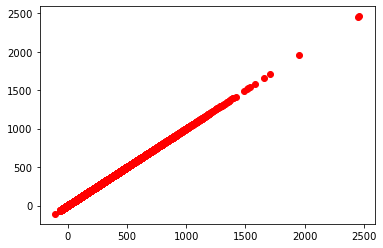

In [15]:
plt.scatter(hipotesis2["ArrDelay"],suma2,color="red")
plt.show()

Parece que las hipotesis son correctas ya que las columna suma es practicamente 0.<br>
Graficamos para tener una perspectiva de los campos que hemos visto y añadimos las columnas con las causas de retrasos.

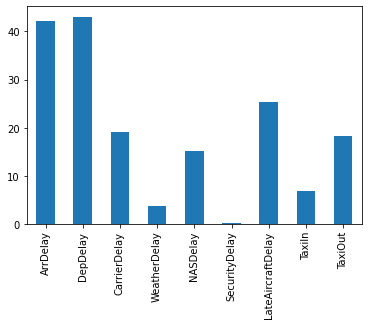

In [16]:
import matplotlib.pyplot as plt
causas_delay=delay_filtrado_df[["ArrDelay","DepDelay","CarrierDelay","WeatherDelay","NASDelay","SecurityDelay","LateAircraftDelay","TaxiIn","TaxiOut"]]
causas_delay.mean().plot(kind="bar")
plt.show()


Observamos que dentro de las causas de retraso , la que tiene mayor peso es la debidad a acumulación de retrasos (_LateAircraftDelay_), seguida de causas de operativa de las aerolineas y en tercer lugar problemas del propio sistema de gestión de la red aérea.<br>
En el vistazo que hemos realizado antes tambien se puede inferir que lo campos de causas se cuantifican en funcion del _ArrDelay_ y solo a partir de ciertos minutos de retraso.<br>
Comprobamos , filtrando por tiempo (15 min ),tanto para ArrDelay como para DepDElay, para comprobar la relación

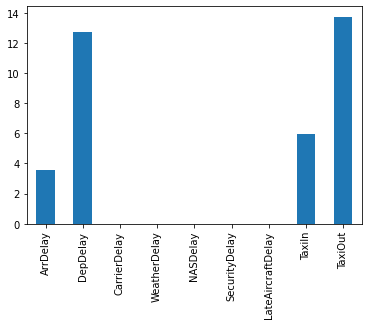

In [17]:
filtro1=causas_delay["ArrDelay"]<15.0
causas_delay[filtro1].mean().plot(kind="bar")
plt.show()

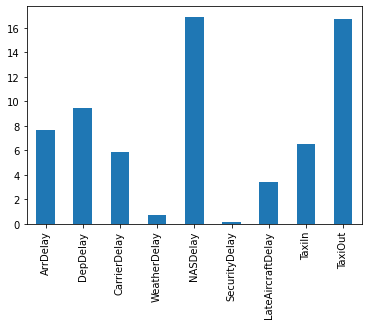

In [18]:
filtro2=causas_delay["DepDelay"]<15.0
causas_delay[filtro2].mean().plot(kind="bar")
plt.show()

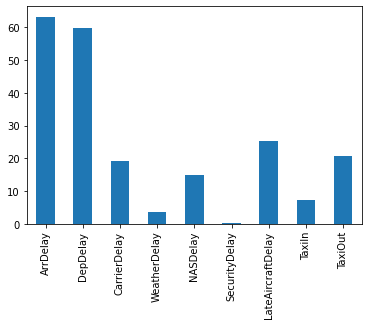

In [19]:
filtro1=causas_delay["ArrDelay"]>=15.0
causas_delay[filtro1].mean().plot(kind="bar")
plt.show()

Parece ser que efectivamente los retrasos de menos de 125 mion no són tenidos en cuenta para justificar su causa y que estos despeden de _ArrDelay_ que por la hipótesis2 que hemos hecho anteriormente tiene sentido(ya que el cmapo _DepDelay_ es parte del calculo de _ArrDelay_)
Por todo ello , para nuestro objetivos , nos podemos deshacer de _TaxiIn_, _TaxiOut_, _DepDelay_. También eliminamos los campos _Origin_ y _Dest_ ya que para nuestro objetivos disponemos del campo _Distance_


In [20]:
delay_filtrado_df=delay_filtrado_df.drop(["TaxiIn","TaxiOut","DepDelay","Origin","Dest"],axis=1)
delay_filtrado_df[:3]

,Month,DayofMonth,DayOfWeek,UniqueCarrier,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,Distance,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,1,3,4,WN,128.0,150.0,116.0,-14.0,810,NaN,NaN,NaN,NaN,NaN
1,1,3,4,WN,128.0,145.0,113.0,2.0,810,NaN,NaN,NaN,NaN,NaN
2,1,3,4,WN,96.0,90.0,76.0,14.0,515,NaN,NaN,NaN,NaN,NaN


Ahora podemos echar un vistazo a los campos _Month_ y _DayOfWeek_ para ver si tiene influencia.Empezamos por los meses:

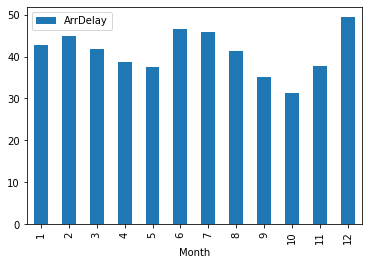

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
viajes=delay_filtrado_df[["Month","DayofMonth"]]
aeropuertos_day=delay_filtrado_df[["DayOfWeek","ArrDelay"]]
aeropuertos_df=delay_filtrado_df[["Month","ArrDelay"]]
(aeropuertos_df.groupby(by="Month").mean()).sort_values("Month").plot(kind="bar")
plt.show()


Podemos intuir gráficamente que los atrasos parecen empeorar en los períodos de vacaciones (especialmente Diciembre), lo cual tiene lógica ya que seran cuando más desplazamientos haya y más estresado este el sistema. Continuemos mirando si el día de la semana tiene influencia:

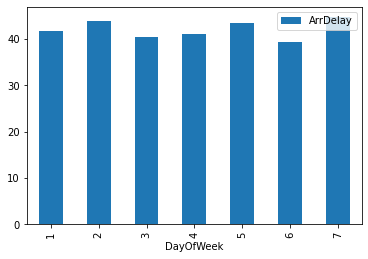

In [22]:
(aeropuertos_day.groupby(by="DayOfWeek").mean()).sort_values("DayOfWeek").plot(kind="bar")
plt.show()

El día de la semana no parece ser un factor importante, 

In [23]:
(aeropuertos_day.groupby("DayOfWeek")).mean()

,ArrDelay
DayOfWeek,
1,41.731356
2,43.806679
3,40.438229
4,41.071599
5,43.493618
6,39.393828
7,44.697413


con todo lo visto nos centraremos en las causas de los delays para seguir trabajando y descartaremos los dias ,meses y demas campos.

In [24]:
delay_filtrado_df=delay_filtrado_df.drop(["Month","DayofMonth","DayOfWeek"],axis=1)

Con lo que nuestro dataframe quedaria con el siguiente aspecto:

In [25]:
delay_filtrado_df[:5]


,UniqueCarrier,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,Distance,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,WN,128.0,150.0,116.0,-14.0,810,NaN,NaN,NaN,NaN,NaN
1,WN,128.0,145.0,113.0,2.0,810,NaN,NaN,NaN,NaN,NaN
2,WN,96.0,90.0,76.0,14.0,515,NaN,NaN,NaN,NaN,NaN
3,WN,90.0,90.0,77.0,34.0,515,2.0,0.0,0.0,0.0,32.0
4,WN,101.0,115.0,87.0,11.0,688,NaN,NaN,NaN,NaN,NaN


### Exercici 2

Fes un informe complet del data set:

    Resumeix estadísticament les columnes d’interès
    Troba quantes dades faltants hi ha per columna
    Crea columnes noves (velocitat mitjana del vol, si ha arribat tard o no...)
    Taula de les aerolínies amb més endarreriments acumulats
    Quins són els vols més llargs? I els més endarrerits?
    Etc.

Veamos un resumen estadístico de los datos con los que nos hemos quedado:

In [26]:
 delay_filtrado_df.describe()


,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,Distance,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,1.928371e+06,1.928371e+06,1.928371e+06,1.928371e+06,1.928371e+06,1.247488e+06,1.247488e+06,1.247488e+06,1.247488e+06,1.247488e+06
mean,1.333059e+02,1.341977e+02,1.082771e+02,4.219988e+01,7.649486e+02,1.917940e+01,3.703571e+00,1.502164e+01,9.013714e-02,2.529647e+01
std,7.206007e+01,7.123339e+01,6.864261e+01,5.678472e+01,5.738858e+02,4.354621e+01,2.149290e+01,3.383305e+01,2.022714e+00,4.205486e+01
min,1.400000e+01,-2.100000e+01,0.000000e+00,-1.090000e+02,1.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,8.000000e+01,8.200000e+01,5.800000e+01,9.000000e+00,3.380000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.160000e+02,1.160000e+02,9.000000e+01,2.400000e+01,6.060000e+02,2.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,8.000000e+00
75%,1.650000e+02,1.650000e+02,1.370000e+02,5.600000e+01,9.970000e+02,2.100000e+01,0.000000e+00,1.500000e+01,0.000000e+00,3.300000e+01
max,1.114000e+03,6.600000e+02,1.091000e+03,2.461000e+03,4.962000e+03,2.436000e+03,1.352000e+03,1.357000e+03,3.920000e+02,1.316000e+03


Veamos los valores NAN que tenemos en nuestro Dataframe

In [27]:
delay_filtrado_df.isna().sum()

UniqueCarrier             0
ActualElapsedTime         0
CRSElapsedTime            0
AirTime                   0
ArrDelay                  0
Distance                  0
CarrierDelay         680883
WeatherDelay         680883
NASDelay             680883
SecurityDelay        680883
LateAircraftDelay    680883
dtype: int64

Esto es compatible con las concluciones que habiamos extraido en la primera parte y donde comprobamos que solo se cuentan las causas de retardo a partir de los 15 min en _ArrDelay_

Veamos ahora que compañias acumulan más retrasos y cúales són más puntuales.Para ello creamos un dataframe con los campos que nos interesan y gráficamos:

In [28]:

compañia_retrasos=delay_filtrado_df[["UniqueCarrier","ArrDelay"]]


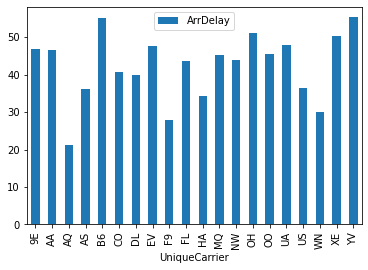

In [29]:
(compañia_retrasos.groupby(by="UniqueCarrier").mean()).plot(kind="bar")
plt.show()



Ordenamos de más a menos retraso medio, y vemos algunos datos.

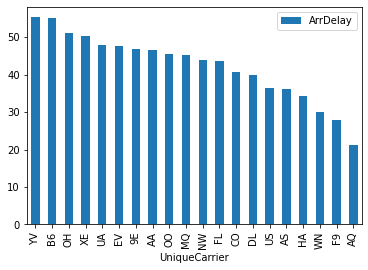

In [30]:
compañia_retrasos["ArrDelay"].max()
(compañia_retrasos.groupby(by="UniqueCarrier").mean()).sort_values("ArrDelay",ascending=False).plot(kind="bar")
plt.show()

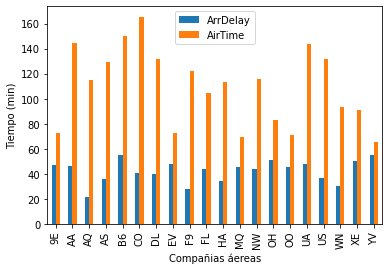

In [31]:
companys=delay_filtrado_df[["UniqueCarrier","ArrDelay","AirTime"]]
(companys.groupby("UniqueCarrier").mean()).plot(kind="bar")
plt.xlabel("Compañias áereas")
plt.ylabel("Tiempo (min)")
plt.show()

In [32]:
compañia_retrasos.groupby(by="UniqueCarrier").mean().sort_values("ArrDelay",ascending=False)[:5]

,ArrDelay
UniqueCarrier,
YV,55.287049
B6,55.088739
OH,51.016968
XE,50.181217
UA,47.784399


In [33]:
compañia_retrasos.groupby(by="UniqueCarrier").mean().sort_values("ArrDelay")[:5]

,ArrDelay
UniqueCarrier,
AQ,21.255376
F9,27.938953
WN,30.087884
HA,34.209449
AS,36.060882


Vemos que si vamos en las compañias YV e B6, tenemos bastantes posibilidades de tener un retraso mayor a la media. Sieno la mejor compañia AQ

In [34]:
compañia_retrasos.ArrDelay.describe()

count    1.928371e+06
mean     4.219988e+01
std      5.678472e+01
min     -1.090000e+02
25%      9.000000e+00
50%      2.400000e+01
75%      5.600000e+01
max      2.461000e+03
Name: ArrDelay, dtype: float64

Vemos un gráfico del Spring 3 que nos da una idea de los valores outliers.

<img src="ArrDelay.jpg">

vamos a insertar una columna con la velocidad de vuelo media.Para ello cogeremos y divideremos los campos distancia/tiempo en vuelo.pasaremos el tiempo a horas , con lo que nos quedaran millas/hora.<br>
Llamaremos a este campo _Speed_

In [35]:
velocidad=(delay_filtrado_df["Distance"]/(delay_filtrado_df["AirTime"]/60)).round(2)
delay_filtrado_df.insert(3,"Speed",velocidad,allow_duplicates=False)

In [36]:
delay_filtrado_df[:3]


,UniqueCarrier,ActualElapsedTime,CRSElapsedTime,Speed,AirTime,ArrDelay,Distance,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,WN,128.0,150.0,418.97,116.0,-14.0,810,NaN,NaN,NaN,NaN,NaN
1,WN,128.0,145.0,430.09,113.0,2.0,810,NaN,NaN,NaN,NaN,NaN
2,WN,96.0,90.0,406.58,76.0,14.0,515,NaN,NaN,NaN,NaN,NaN


Ahora vemos los trayectos más largos y más cortos respecticvamente.

In [37]:
#delay_filtrado_df[.sort_values("Distance",ascending=False)[:5]]
delay_filtrado_df.nlargest(3,["Distance"])

,UniqueCarrier,ActualElapsedTime,CRSElapsedTime,Speed,AirTime,ArrDelay,Distance,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
173177,CO,634.0,660.0,492.10,605.0,-15.0,4962,NaN,NaN,NaN,NaN,NaN
173676,CO,658.0,660.0,482.53,617.0,12.0,4962,NaN,NaN,NaN,NaN,NaN
173695,CO,646.0,660.0,479.42,621.0,-8.0,4962,NaN,NaN,NaN,NaN,NaN


In [38]:
delay_filtrado_df.sort_values("Distance")[:5]

,UniqueCarrier,ActualElapsedTime,CRSElapsedTime,Speed,AirTime,ArrDelay,Distance,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
774654,OH,48.0,60.0,21.29,31.0,145.0,11,145.0,0.0,0.0,0.0,0.0
1310766,OH,60.0,60.0,47.14,14.0,55.0,11,55.0,0.0,0.0,0.0,0.0
47146,OH,55.0,60.0,130.91,11.0,135.0,24,135.0,0.0,0.0,0.0,0.0
521905,9E,26.0,17.0,144.00,10.0,33.0,24,0.0,0.0,9.0,0.0,24.0
169785,B6,51.0,50.0,94.74,19.0,12.0,30,NaN,NaN,NaN,NaN,NaN


Los vuelos con mayor retraso :

In [39]:
delay_filtrado_df.sort_values("ArrDelay",ascending=False)[:5]

,UniqueCarrier,ActualElapsedTime,CRSElapsedTime,Speed,AirTime,ArrDelay,Distance,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
322516,NW,459.0,455.0,545.35,437.0,2461.0,3972,1455.0,0.0,4.0,0.0,1002.0
686014,NW,154.0,168.0,422.73,132.0,2453.0,930,2436.0,0.0,0.0,0.0,17.0
839306,NW,172.0,173.0,448.97,145.0,1951.0,1085,1951.0,0.0,0.0,0.0,0.0
1009553,MQ,72.0,75.0,364.80,50.0,1707.0,304,1707.0,0.0,0.0,0.0,0.0
1881639,NW,259.0,201.0,351.25,192.0,1655.0,1124,1307.0,0.0,58.0,0.0,290.0


Para ver mejor el drama ;), inserto una columna nueva con el tiempo en horas

In [40]:
delay_filtrado_df.insert(6,"Horas_Delay",(delay_filtrado_df["ArrDelay"]/60).round(2),allow_duplicates=False)

In [41]:
delay_filtrado_df.sort_values("Horas_Delay",ascending=False)

,UniqueCarrier,ActualElapsedTime,CRSElapsedTime,Speed,AirTime,ArrDelay,Horas_Delay,Distance,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
322516,NW,459.0,455.0,545.35,437.0,2461.0,41.02,3972,1455.0,0.0,4.0,0.0,1002.0
686014,NW,154.0,168.0,422.73,132.0,2453.0,40.88,930,2436.0,0.0,0.0,0.0,17.0
839306,NW,172.0,173.0,448.97,145.0,1951.0,32.52,1085,1951.0,0.0,0.0,0.0,0.0
1009553,MQ,72.0,75.0,364.80,50.0,1707.0,28.45,304,1707.0,0.0,0.0,0.0,0.0
1881639,NW,259.0,201.0,351.25,192.0,1655.0,27.58,1124,1307.0,0.0,58.0,0.0,290.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
109745,F9,82.0,164.0,1090.00,66.0,-67.0,-1.12,1199,NaN,NaN,NaN,NaN,NaN
352034,AQ,295.0,370.0,534.51,284.0,-68.0,-1.13,2530,NaN,NaN,NaN,NaN,NaN
493007,FL,239.0,318.0,432.82,220.0,-69.0,-1.15,1587,NaN,NaN,NaN,NaN,NaN
1469257,UA,311.0,389.0,506.83,293.0,-70.0,-1.17,2475,NaN,NaN,NaN,NaN,NaN


### Exercici 3

Exporta el data set net i amb les noves columnes a Excel.

Para exportarlo a Excel , cambiaremos los valores NaN por ceros para que se pueda trabajar con ellos desde excel.

In [42]:
vuelos_filtrados=delay_filtrado_df.fillna(0)

In [43]:
vuelos_filtrados[:10]

,UniqueCarrier,ActualElapsedTime,CRSElapsedTime,Speed,AirTime,ArrDelay,Horas_Delay,Distance,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,WN,128.0,150.0,418.97,116.0,-14.0,-0.23,810,0.0,0.0,0.0,0.0,0.0
1,WN,128.0,145.0,430.09,113.0,2.0,0.03,810,0.0,0.0,0.0,0.0,0.0
2,WN,96.0,90.0,406.58,76.0,14.0,0.23,515,0.0,0.0,0.0,0.0,0.0
3,WN,90.0,90.0,401.30,77.0,34.0,0.57,515,2.0,0.0,0.0,0.0,32.0
4,WN,101.0,115.0,474.48,87.0,11.0,0.18,688,0.0,0.0,0.0,0.0,0.0
5,WN,240.0,250.0,415.04,230.0,57.0,0.95,1591,10.0,0.0,0.0,0.0,47.0
6,WN,130.0,135.0,468.68,106.0,1.0,0.02,828,0.0,0.0,0.0,0.0,0.0
7,WN,121.0,135.0,464.30,107.0,80.0,1.33,828,8.0,0.0,0.0,0.0,72.0
8,WN,52.0,50.0,262.70,37.0,11.0,0.18,162,0.0,0.0,0.0,0.0,0.0
9,WN,228.0,240.0,419.44,213.0,15.0,0.25,1489,3.0,0.0,0.0,0.0,12.0


In [44]:
nombre=input("Introduce nombre archivo excel")
nombre+=".xlsx"
# vuelos_filtrados.to_excel(nombre) Esto da error por tamaño de archivo , asi que reduzco los datos a las 1000 primeras líneas
vuelos_filtrados=vuelos_filtrados[:1000]
vuelos_filtrados.to_excel(nombre)